Optimizado un paso.
Optimizado un paso.
Optimizado un paso.
-1.0


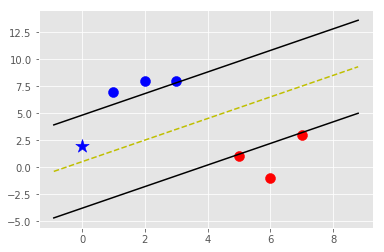

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

class Maquina_Soporte_Vectorial:

    #Incializamos la clase,  asignamos la visualizacion para crear una gráfica vacía
    def __init__(self):
        self.colores = {1:'r',-1:'b'} #Asignamos colores a los puntos dependiendo de si es 1 o -1

        #Creamos la gráfica 
        self.fig = plt.figure()    
        self.ax = self.fig.add_subplot(1,1,1)
    
    #Método para entrenar el modelo, recibe dato de un diccionario
    def fit(self, datos):
        self.datos = datos
        # { ||w||: [w,b] } -> Magnitud de w es la llave
        # Valores una lista en la que estan w y b
        #diccionario_optimizado ira guardando los valores optimizados de nuestra recta (hiperplano)
        diccionario_optimizado = {}

        #Revisa cada posible combimación de un vector que se aplicara a w
        transformaciones = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        #Queremos obtener los valores maximos y minimos de nuestro diccionario de entrada
        datos_completos = []
        #El primer for recorre las llaves del diccionario, es decir -1 y 1
        for yi in self.datos:
            #Al contener cada llave una lista de listas necesitamos 2 for para recorrer los elementos
            for lista in self.datos[yi]:
                for elemento in lista:
                    #Agregamos cada numero del diccionario a una lista simple
                    datos_completos.append(elemento)

        #Obtenemos los valores maximos y mínimos de esa lista
        self.valor_max = max(datos_completos)
        self.valor_min = min(datos_completos)

        #Eliminamos la info de all datos porque solo nos interesan los valores max y min
        datos_completos = None

        # Sabemos que tenemos un vector de soporte cuando yi(xi.w+b) = 1
        #Los tamanio_pasos nos ayudan a llegar  a un numero muy cercano a 1, es decir 1.002
        #En caso de no acercarnos a ese numero entonces debemos agregar pasos más pequeños
        
        #tamaño de paso para optimizar ||w||, comenzamos con 10%, 1% y 0.1%
        tamanio_pasos = [self.valor_max * 0.1,
                      self.valor_max * 0.01,
                      self.valor_max * 0.001,
                      ]

        
        #Definimos el paso que va a tomar nuestro parametro b, este no necesita ser tan preciso
        b_multiplo_rango = 2
        b_multiplo_paso = 5

        #El punto de inicio, primer elemento del vector w
        ultimo_optimizado = self.valor_max*10
        
        
        #Comenzamos a recorrer los pasos
        for paso in tamanio_pasos:
            #El primero elemento de w será [70,70]
            w = np.array([ultimo_optimizado,ultimo_optimizado])
            #Nos indica cuando ya terminamos con todos los pasos por recorrer
            optimizado = False

            #En caso de aun no estar optimizado
            while not optimizado:
                #Queremos tener el maximo de b
                #Vamos a probar con los valores de b, en un arreglo que va desde negativo a positivo reduciendo en cada iteracion el tamaño de paso
                for b in np.arange(-1*(self.valor_max*b_multiplo_rango),
                                   self.valor_max*b_multiplo_rango,
                                   paso*b_multiplo_paso):

                    #Recorremos las transformaciones
                    for transformacion in transformaciones:
                        #Multiplicamos el vector de transformaciones por nuestro vector w
                        w_t = w*transformacion
                        
                        #Tomamos como correcto el valor inicial
                        opcion_encontrada = True
                        # yi(xi.w+b) >= 1

                        #Recorremos nuestro vector de entrada
                        #El primer for recorre la clase, es decir -1 o 1 
                        for i in self.datos:
                            
                            #El segundo for recorre las listas que contienen listas
                            for xi in self.datos[i]:
                            
                                #Igualamos las clases a yi
                                yi=i
                                #Revisamos que cumpla la condicion, en caso de que no, marcamos como False
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    opcion_encontrada = False
                                    
                        if opcion_encontrada:
                            #Recordemos que diccionario_optimizado era un diccionario de la forma ||w||:{w,b}
                            # np.linalg.norm() obtiene la norma del vector la cual es nuestra llave
                            # Nuestros valores seran [w,b]
                            diccionario_optimizado[np.linalg.norm(w_t)] = [w_t,b]
                            

                #ya que corrimos todas la opciones de b y w
                #Revisamos que ya se hayan probado las opciones negativas 
                #Podemos decir como condicion que w[0]<0 porque más arriba en transformaciones ya probamos los negativos entonces 
                #Llegando a menos que cero significa que ya probamos todas las opciones posibles en este tamaño de paso
                if w[0] < 0:
                    optimizado = True
                    print('Optimizado un paso.')
                #En caso de que no le restamos el paso a nuestro vector 
                else:
                    #w=[5,5] 
                    #paso=1
                    #w=[5,5]-1=[4,4]
                    #En matematicas no hacemos esto pero python permite la operacion
                    w = w - paso
                    #print(w)

            #Hacemos un nuevo vector con las magnitudes ordenadas en diccionario_optimizado
            #Del menor al mayor
            normas = sorted([n for n in diccionario_optimizado])
            #||w|| : [w,b]
            #Por lo que elegimos la primer norma
            opcion_optimizada = diccionario_optimizado[normas[0]]
            #nuestra w es el primer elemento del diccionario
            self.w = opcion_optimizada[0]
            #nuestra b el es segundo elemento del diccionario
            self.b = opcion_optimizada[1]
            
            #Acutalizamos nuestro vector con la opcion optimizada y le sumamos el paso multiplicado por 2
            #Esto para "aventar la pelota desde un poco arriba de la parabola"
            #print(opcion_optimizada)
            ultimo_optimizado = opcion_optimizada[0][0]+paso*2
            #print(ultimo_optimizado)
        
                                      
        for i in self.datos:
            for xi in self.datos[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,puntos):
        # sign( x.w+b )
        # np.sign() nos da el signo de una operacion determinada es decir:
        # -1 si x<0    0 si x=0    1 si x>0

        #Necesitamos obtener w y b
        clasificacion = np.sign(np.dot(np.array(puntos),self.w)+self.b)
        #Si no obtenemos un 0, es decir que nuestro dato esta en el borde de desicion
        if clasificacion !=0:
            #graficamos con puntos el elemento x y y, los colores los pasamos como una clase
            self.ax.scatter(puntos[0], puntos[1], s=200, marker='*', c=self.colores[clasificacion])
        #Regresamos el resultado de la clasificacion es decir -1 0 o 1
        return clasificacion

    def visualizar(self):
        #Graficamos la informacion co una sola linea
        #Graficamos los puntos contenidos en data_dict accediendo a ellos con la llave que es la clase
        #i contiene la clase (-1 o 1) la cual obtiene del mismo data_dict
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colores[i]) for x in diccionario_datos[i]] for i in diccionario_datos]


        #graficamos el hiperplano, v es el valor que buscamos
        #nos regresa un valor para y 
        def hiperplano(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        #Establecemos en un rango el tamaño de nuestra grafica
        rango_datos = (self.valor_min*0.9,self.valor_max*1.1)
        #rango datos = (-1*0.9 , 8*1.1)
        #Establecemos el minimo y máximo de los hiperplanos
        hip_x_min = rango_datos[0]
        hip_x_max = rango_datos[1]


        #Encontramos el vector de soporte positivo
        #Para dibujar una linea necesitamos dos puntos
        # (w.x+b) = 1
        # positive support vector hiperplano
        #vector_soporte_positivo_1 corresponde a y1
        vector_soporte_positivo_1 = hiperplano(hip_x_min, self.w, self.b, 1) #valor escalar 
        #vector_soporte_positivo_2 corresponde a y2
        vector_soporte_positivo_2 = hiperplano(hip_x_max, self.w, self.b, 1) #valor escalar
        #Graficamos el psv
        self.ax.plot([hip_x_min,hip_x_max],[vector_soporte_positivo_1,vector_soporte_positivo_2], 'k')

        #Buscamos los dos puntos para buscar el vector de soporte negativo
        # (w.x+b) = -1
        #vector_soporte_negativo_1 corresponde a y1
        vector_soporte_negativo_1 = hiperplano(hip_x_min, self.w, self.b, -1)
        #vector_soporte_negativo_2 corresponde a y2
        vector_soporte_negativo_2 = hiperplano(hip_x_max, self.w, self.b, -1)
        #Graficamos nsv
        self.ax.plot([hip_x_min,hip_x_max],[vector_soporte_negativo_1,vector_soporte_negativo_2], 'k')

        #bucamos los dos puntos para dibujar el borde de desicion
        # (w.x+b) = 0
        #borde_decision_1 corresponde a y1
        borde_decision_1 = hiperplano(hip_x_min, self.w, self.b, 0)
        #borde_decision_2 corresponde a y2
        borde_decision_2 = hiperplano(hip_x_max, self.w, self.b, 0)
        #Graficamos el borde de decison
        self.ax.plot([hip_x_min,hip_x_max],[borde_decision_1,borde_decision_2], 'y--')

        plt.show()
        
diccionario_datos = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Maquina_Soporte_Vectorial()
svm.fit(datos=diccionario_datos)


svm.visualizar()

In [2]:
from sklearn.svm import LinearSVC

X=[[1,7],[2,8],[3,8], [5,1],[6,-1],[7,3]]
y=[-1,-1,-1,1,1,1]

svm= LinearSVC()
svm.fit(X, y)
svm.predict([[8, 15]])

array([-1])